In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("C:\\Users\\lefen\Downloads\\globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)

# Displaying the first few rows of the dataset
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
# Displaying the last few rows of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
# 1. Basic Information check

# checking the Shape of the dataset
shape_info = df.shape

# checking the Data types of the columns
data_types = df.dtypes.value_counts()

# Counting of missing values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

shape_info, data_types, missing_values.head(10)  # Displaying top 10 columns with most missing values for brevity


((181691, 135),
 object     58
 float64    55
 int64      22
 dtype: int64,
 gsubname3           181671
 weapsubtype4        181621
 weapsubtype4_txt    181621
 weaptype4           181618
 weaptype4_txt       181618
 claimmode3          181558
 claimmode3_txt      181558
 gsubname2           181531
 claim3              181373
 guncertain3         181371
 dtype: int64)

In [4]:
# 2. Handling Missing Values and removal of duplicate rows

# Percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
df_cleaned = df.drop(columns=columns_to_drop)

# Fill missing values for other columns based on their data type
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        # Fill missing values for categorical columns with a placeholder ('Unknown')
        df_cleaned[column].fillna('Unknown', inplace=True)
    else:
        # Fill missing values for numerical columns with median
        median_value = df_cleaned[column].median()
        df_cleaned[column].fillna(median_value, inplace=True)

# Removal of Duplicate Rows
df_cleaned.drop_duplicates(inplace=True)
# The dataset is now cleaned, and i saved it as 'gt_dataset'
gt_dataset = df_cleaned
gt_dataset.head()


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,...,0.0,0.0,0,0.0,Unknown,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0.0,0.0,0,1.0,Unknown,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,0,0.0,Unknown,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,1,0.0,Unknown,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,1,0.0,Unknown,PGIS,-9,-9,1,1


In [5]:
# Displaying the last few rows of the new dataset
gt_dataset.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,0.0,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,0,0.0,"""Security tightened in Cotabato following IED ...",START Primary Collection,-9,-9,0,-9


In [6]:
# 3. Data Profiling

# Descriptive statistics for numerical columns
numerical_stats = gt_dataset.describe()

# Distribution of some categorical columns 
categorical_columns = ['country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'gname']
categorical_distribution = df[categorical_columns].apply(lambda x: x.value_counts()).transpose()

numerical_stats, categorical_distribution.head()  


(            eventid          iyear         imonth           iday  \
 count  1.816910e+05  181691.000000  181691.000000  181691.000000   
 mean   2.002705e+11    2002.638997       6.467277      15.505644   
 std    1.325957e+09      13.259430       3.388303       8.814045   
 min    1.970000e+11    1970.000000       0.000000       0.000000   
 25%    1.991021e+11    1991.000000       4.000000       8.000000   
 50%    2.009022e+11    2009.000000       6.000000      15.000000   
 75%    2.014081e+11    2014.000000       9.000000      23.000000   
 max    2.017123e+11    2017.000000      12.000000      31.000000   
 
             extended        country         region       latitude  \
 count  181691.000000  181691.000000  181691.000000  181691.000000   
 mean        0.045346     131.968501       7.160938      23.698173   
 std         0.208063     112.414535       2.933408      18.377236   
 min         0.000000       4.000000       1.000000     -53.154613   
 25%         0.000000      

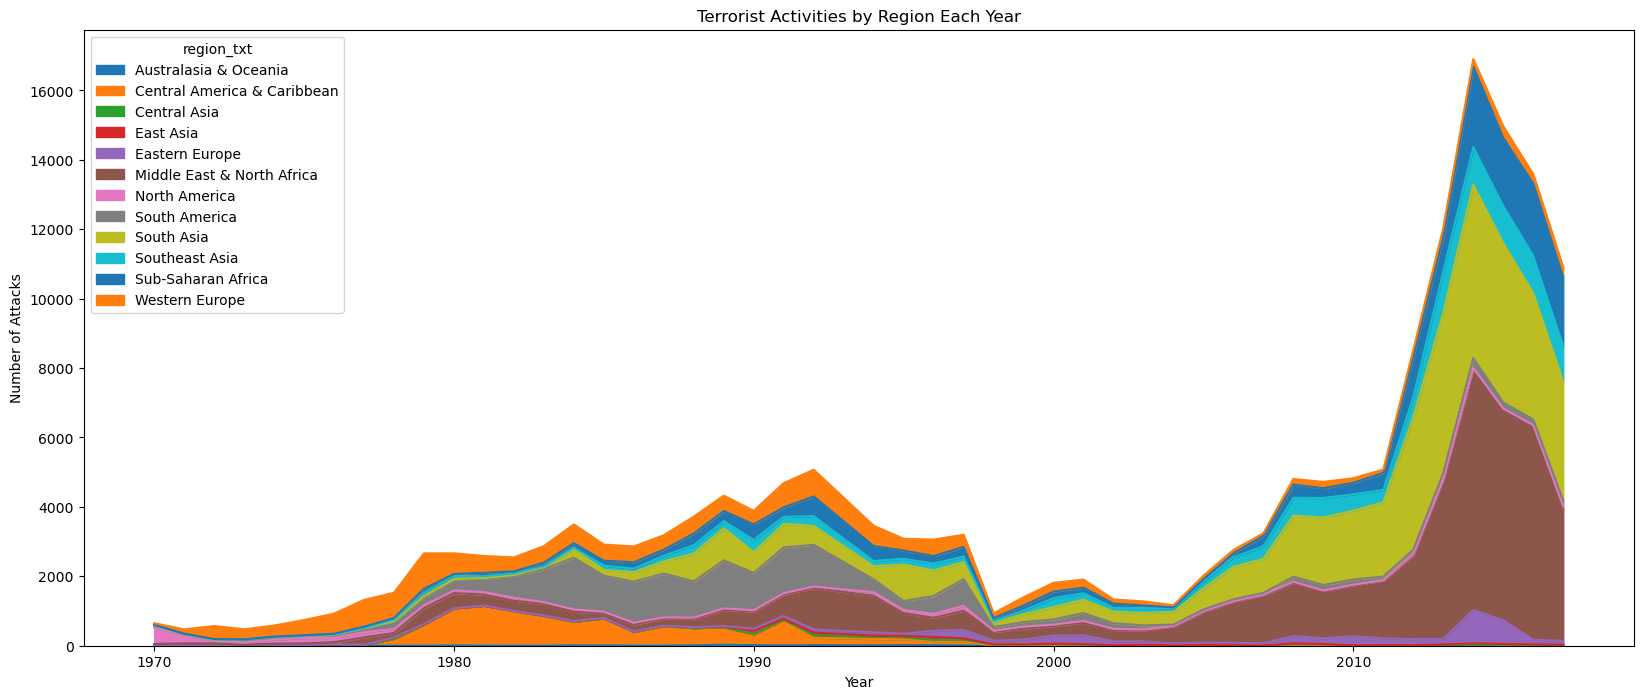

In [8]:
import matplotlib.pyplot as plt
# Create the area plot
activity_by_region_year = pd.crosstab(gt_dataset['iyear'], gt_dataset['region_txt'])
activity_by_region_year.plot(kind='area', figsize=(20, 8))
plt.title('Terrorist Activities by Region Each Year')
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.show()

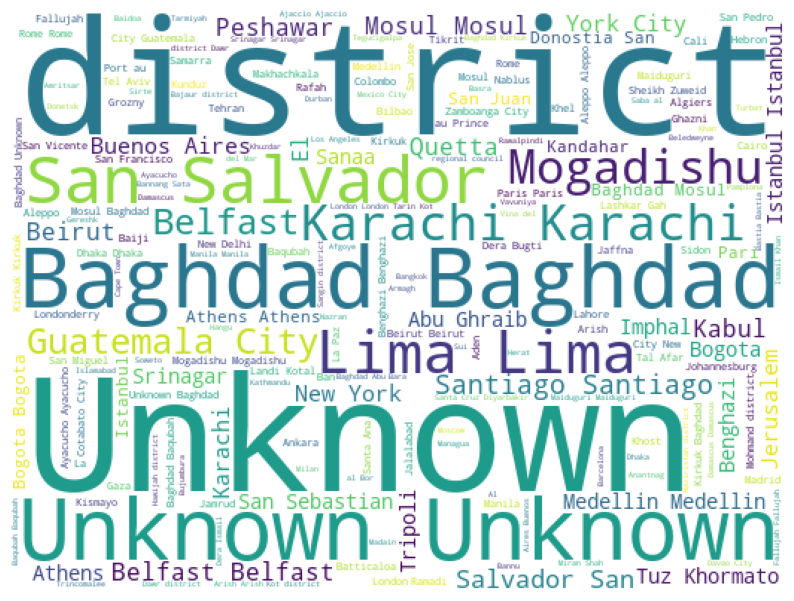

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Dropping NaN values from the 'state' column
cities = gt_dataset['city'].dropna(how='any')
# Creating the word cloud
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', 
                      width=520, 
                      height=390).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

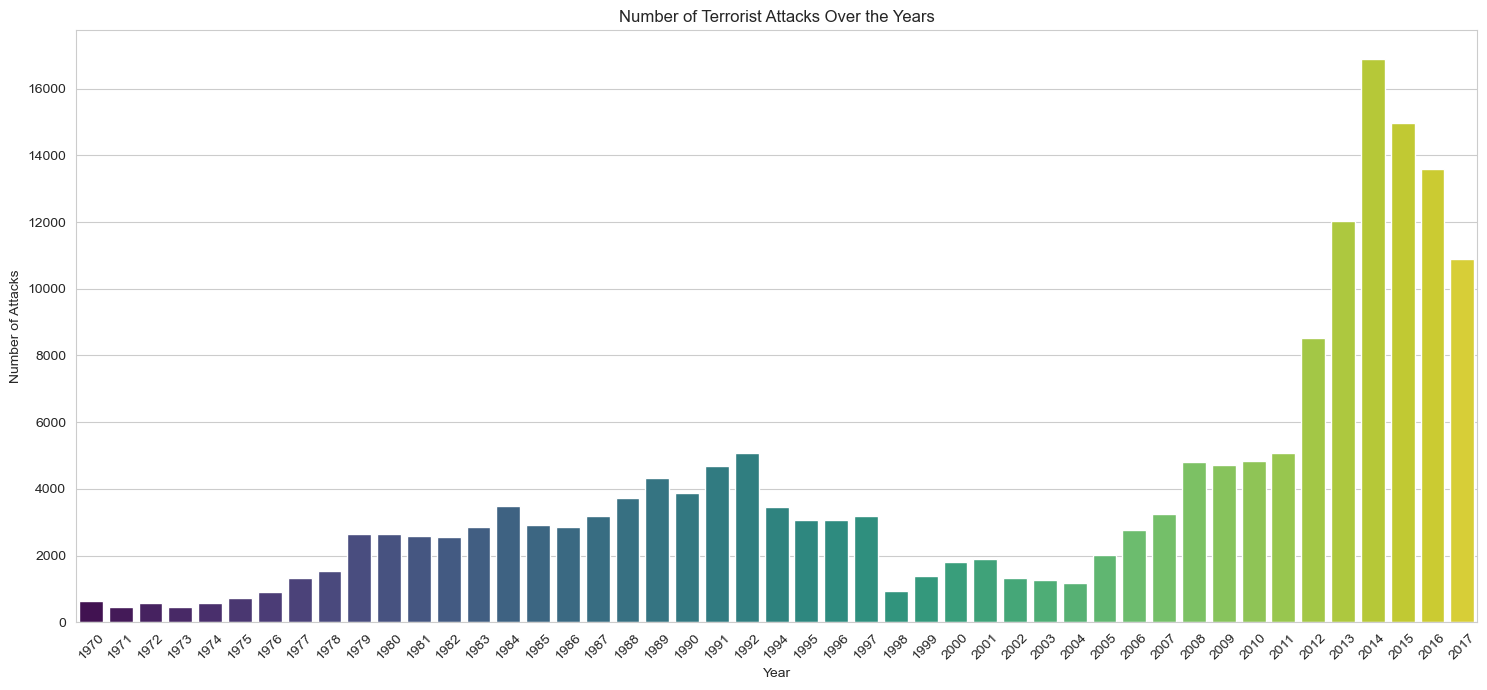

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting up the aesthetics for the plots
sns.set_style("whitegrid")
# Trend of terrorist attacks over the years 1970 - 2017
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='iyear', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

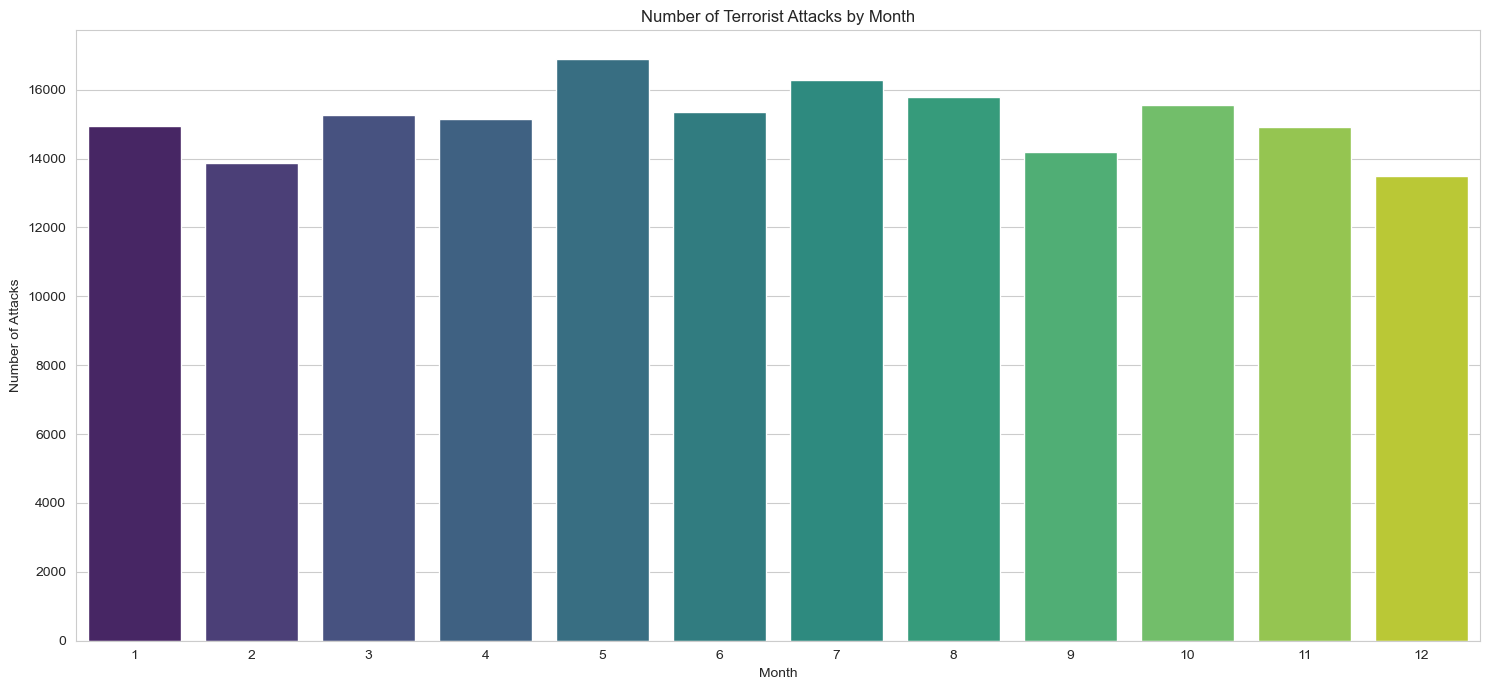

In [11]:
# Trend of monthly terrorist attacks over the years 1970 - 2017
plt.figure(figsize=(15, 7))
sns.countplot(data=gt_dataset, x='imonth', palette='viridis', order=range(1, 13))
plt.title('Number of Terrorist Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

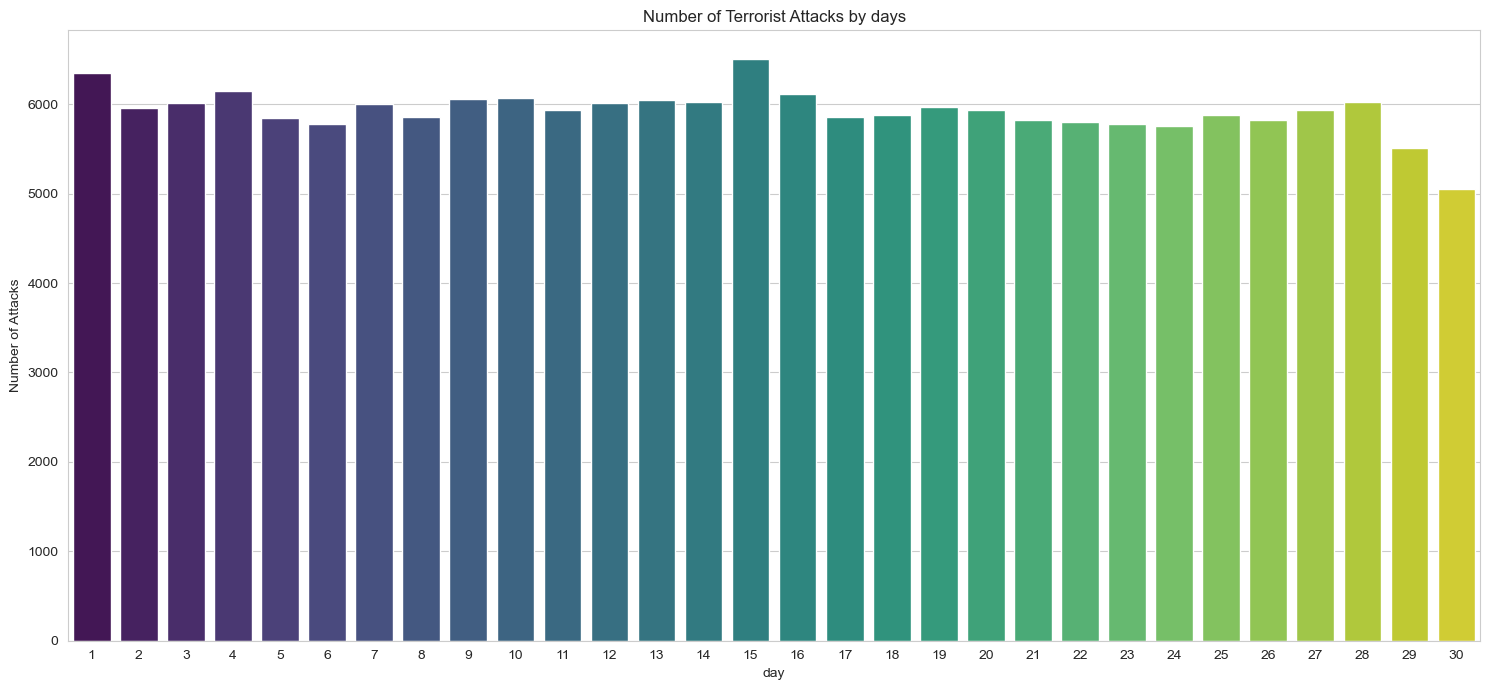

In [12]:
# Trend of daily terrorist attacks over the years 1970 - 2017
plt.figure(figsize=(15, 7))
sns.countplot(data=gt_dataset, x='iday', palette='viridis', order=range(1, 31))
plt.title('Number of Terrorist Attacks by days')
plt.xlabel('day')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

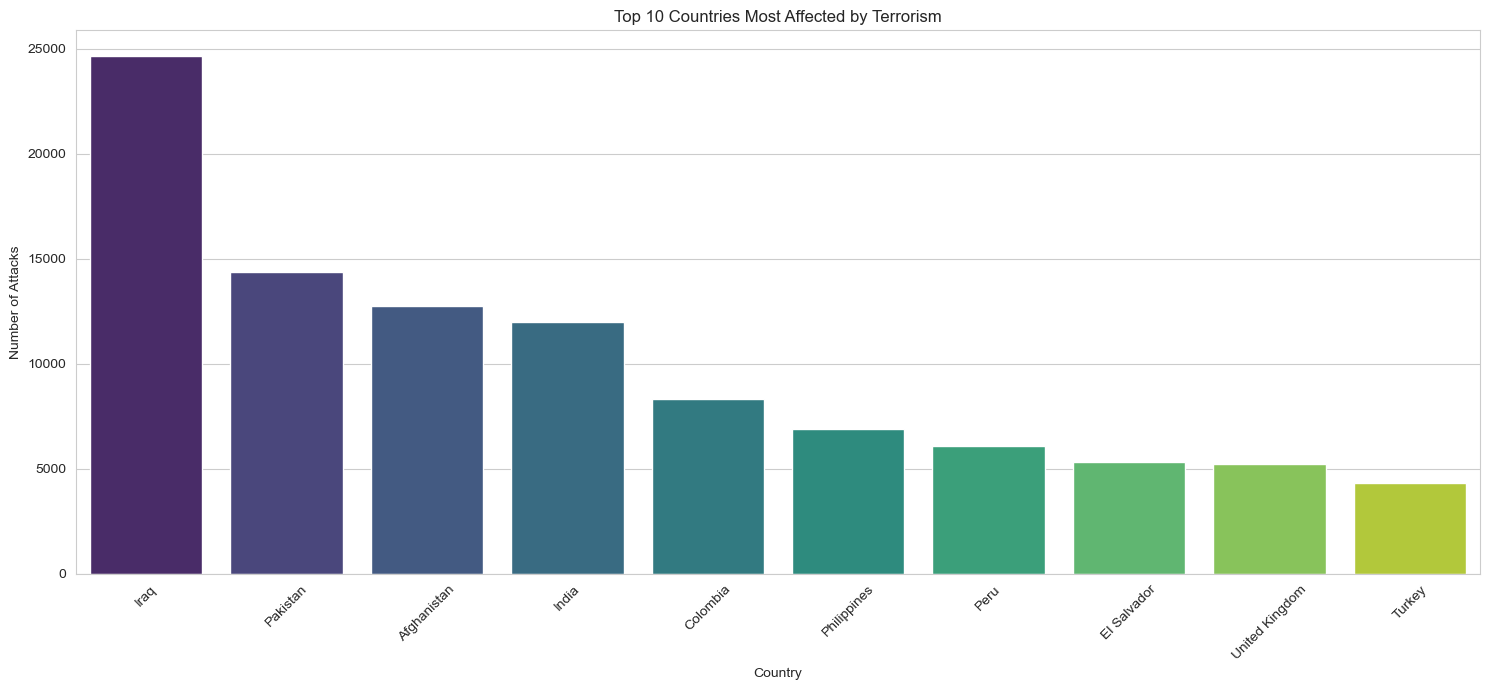

In [13]:
# Top 10 countries most affected by terrorism
top_countries = gt_dataset['country_txt'].value_counts().head(10)
plt.figure(figsize=(15, 7))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Countries Most Affected by Terrorism')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

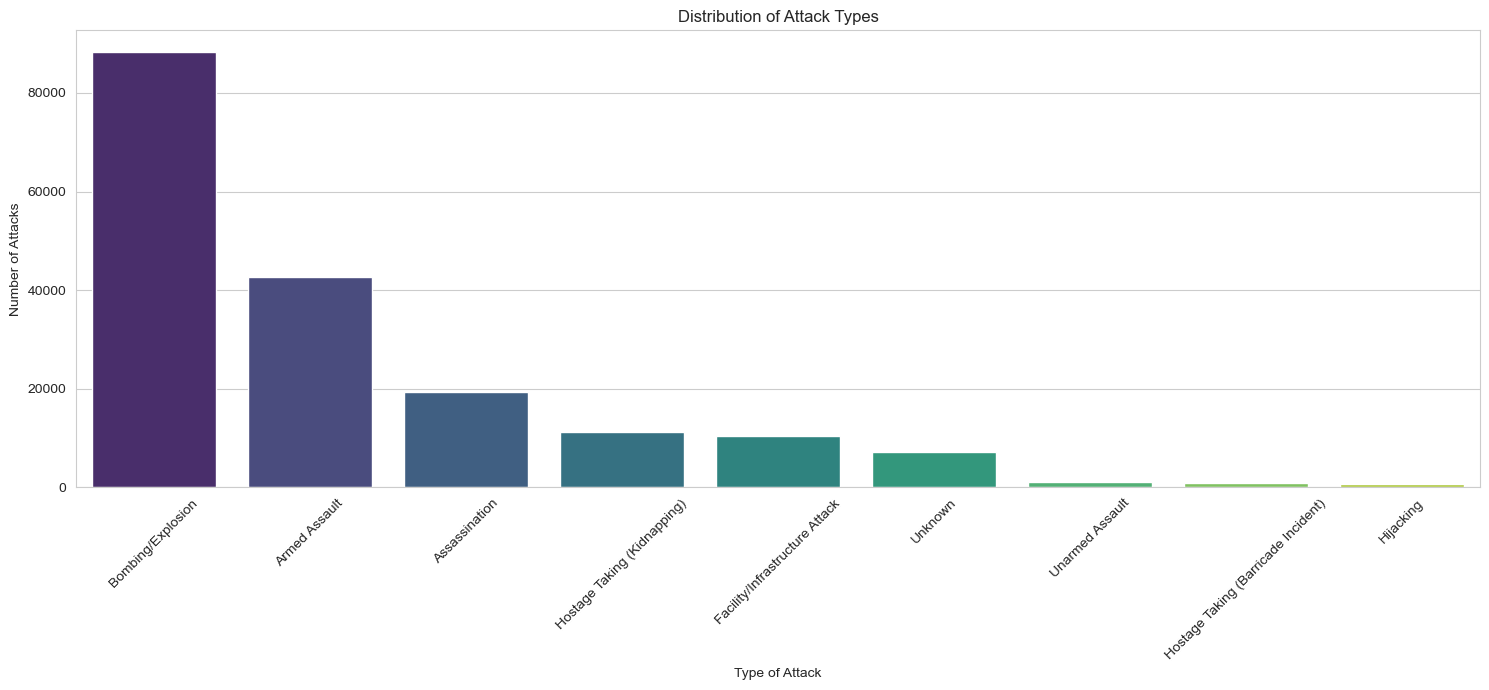

In [14]:
# Distribution of attack types
attack_types = gt_dataset['attacktype1_txt'].value_counts()
plt.figure(figsize=(15, 7))
sns.barplot(x=attack_types.index, y=attack_types.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Attack Types')
plt.xlabel('Type of Attack')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

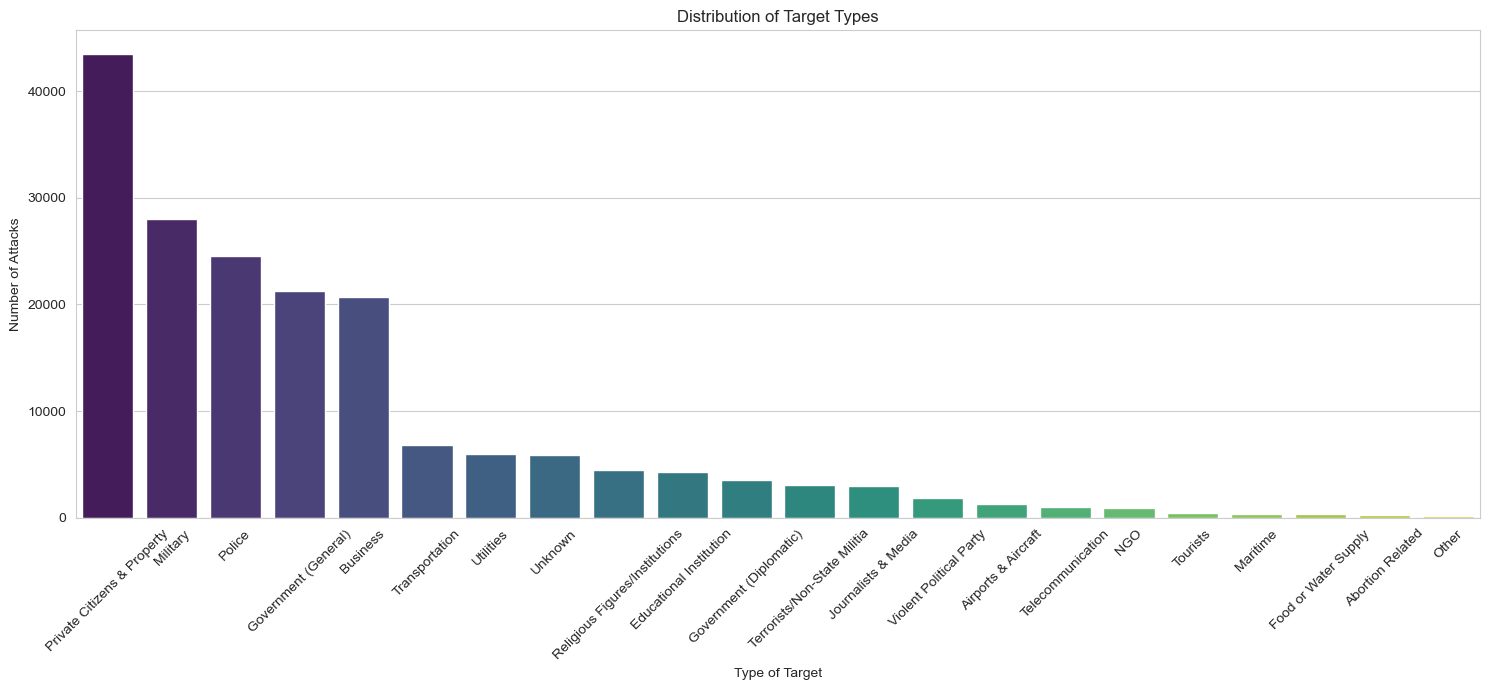

In [15]:
# Distribution of target types
target_types = gt_dataset['targtype1_txt'].value_counts()

plt.figure(figsize=(15, 7))
sns.barplot(x=target_types.index, y=target_types.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Target Types')
plt.xlabel('Type of Target')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

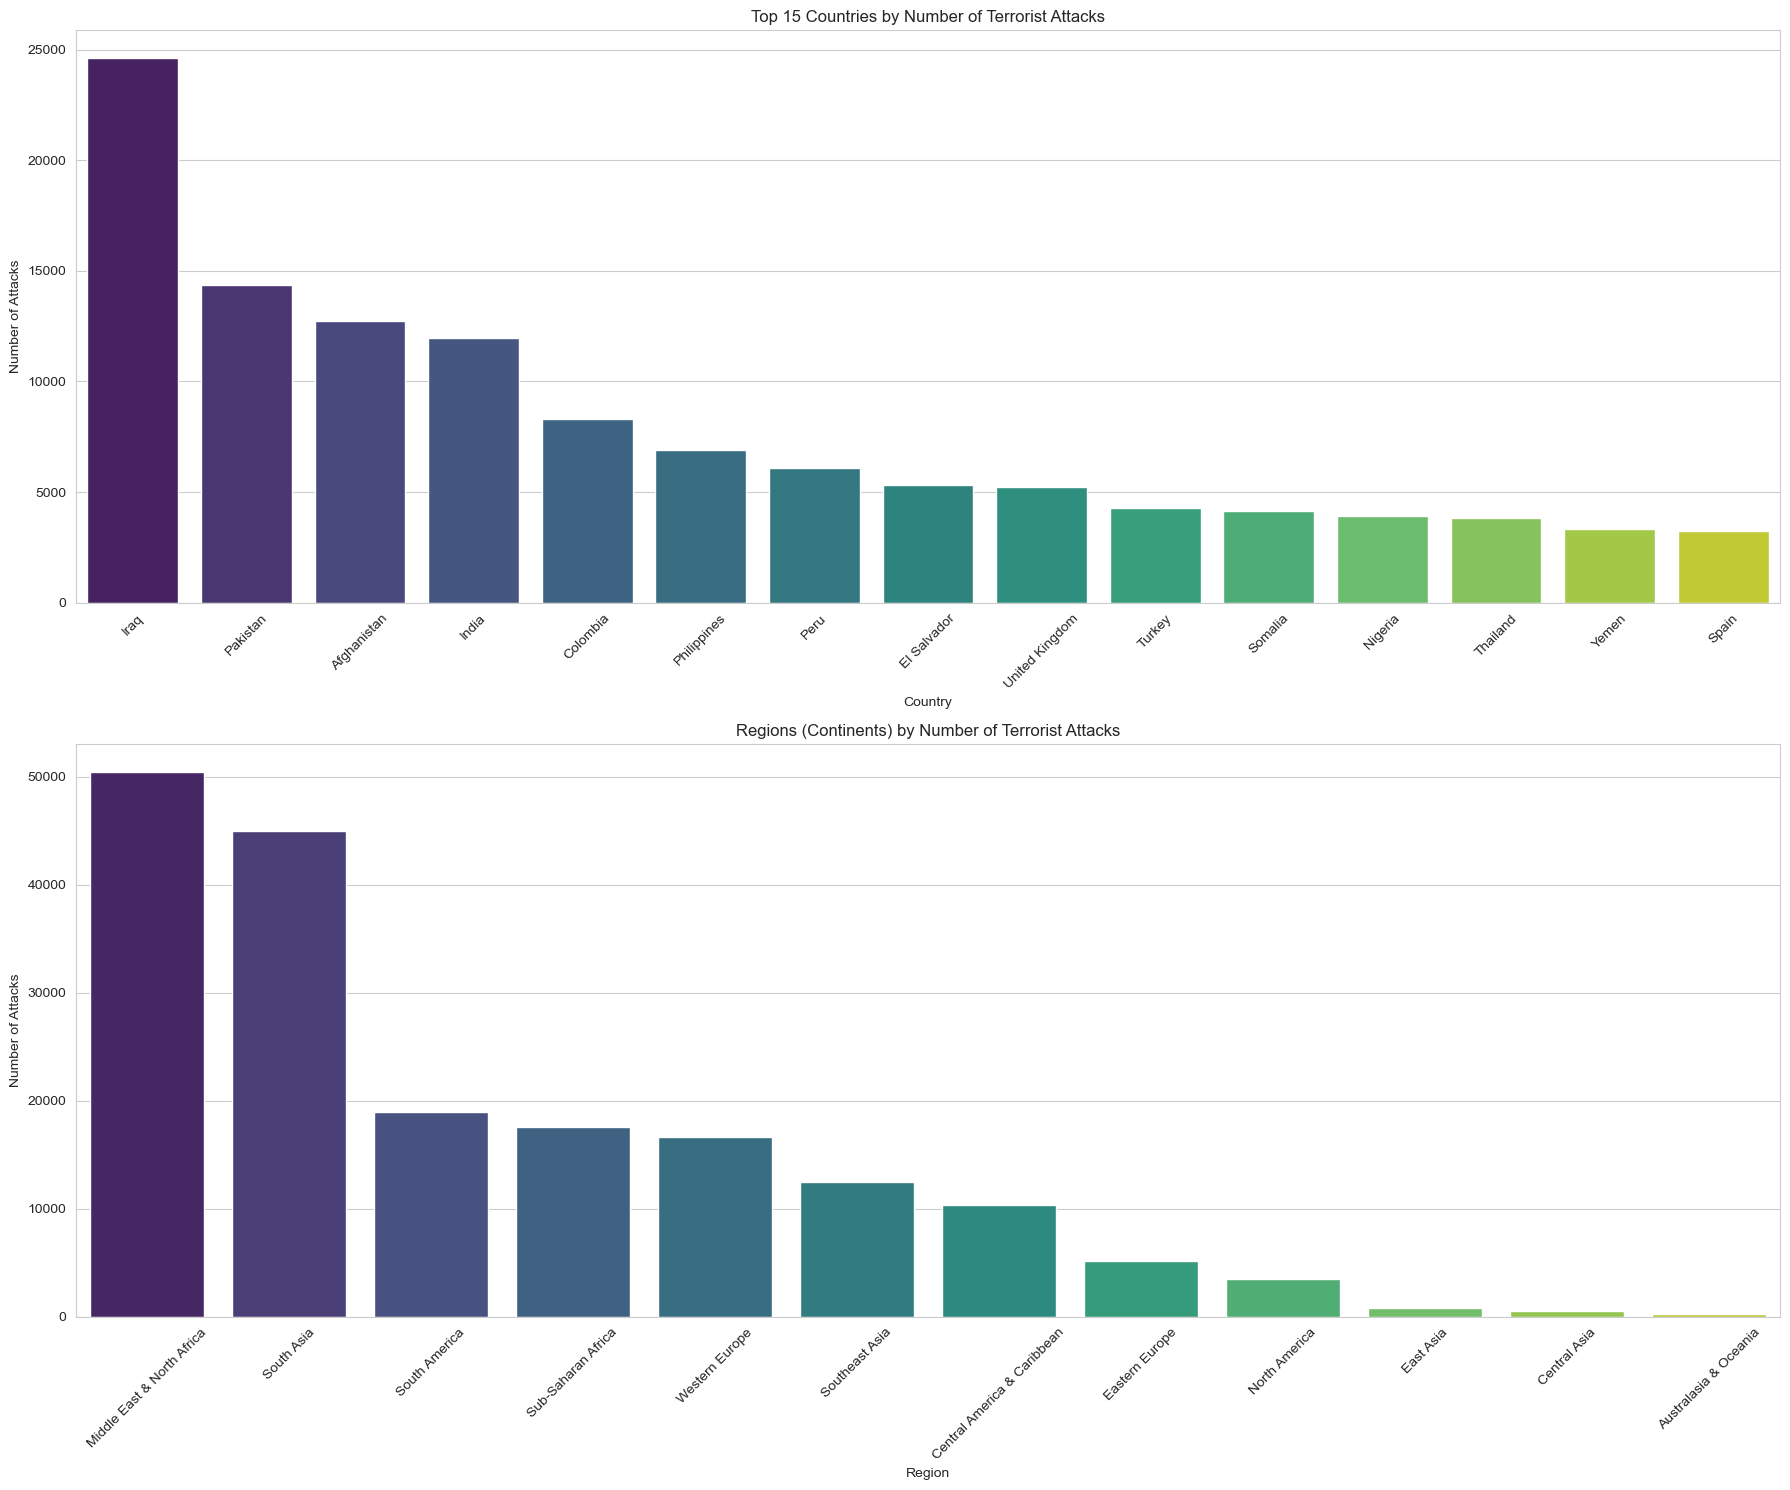

In [16]:
# Grouping the number of attacks by country
attacks_by_country = df['country_txt'].value_counts()
# Grouping the number of attacks by region (continent)
attacks_by_region = df['region_txt'].value_counts()
attacks_by_country, attacks_by_region
# Plotting the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 15))
# Plot for Countries
sns.barplot(x=attacks_by_country.head(15).index, y=attacks_by_country.head(15).values, palette='viridis', ax=ax1)
ax1.set_title('Top 15 Countries by Number of Terrorist Attacks')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Attacks')
ax1.tick_params(axis='x', rotation=45)
# Plot for Regions (Continents)
sns.barplot(x=attacks_by_region.index, y=attacks_by_region.values, palette='viridis', ax=ax2)
ax2.set_title('Regions (Continents) by Number of Terrorist Attacks')
ax2.set_xlabel('Region')
ax2.set_ylabel('Number of Attacks')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

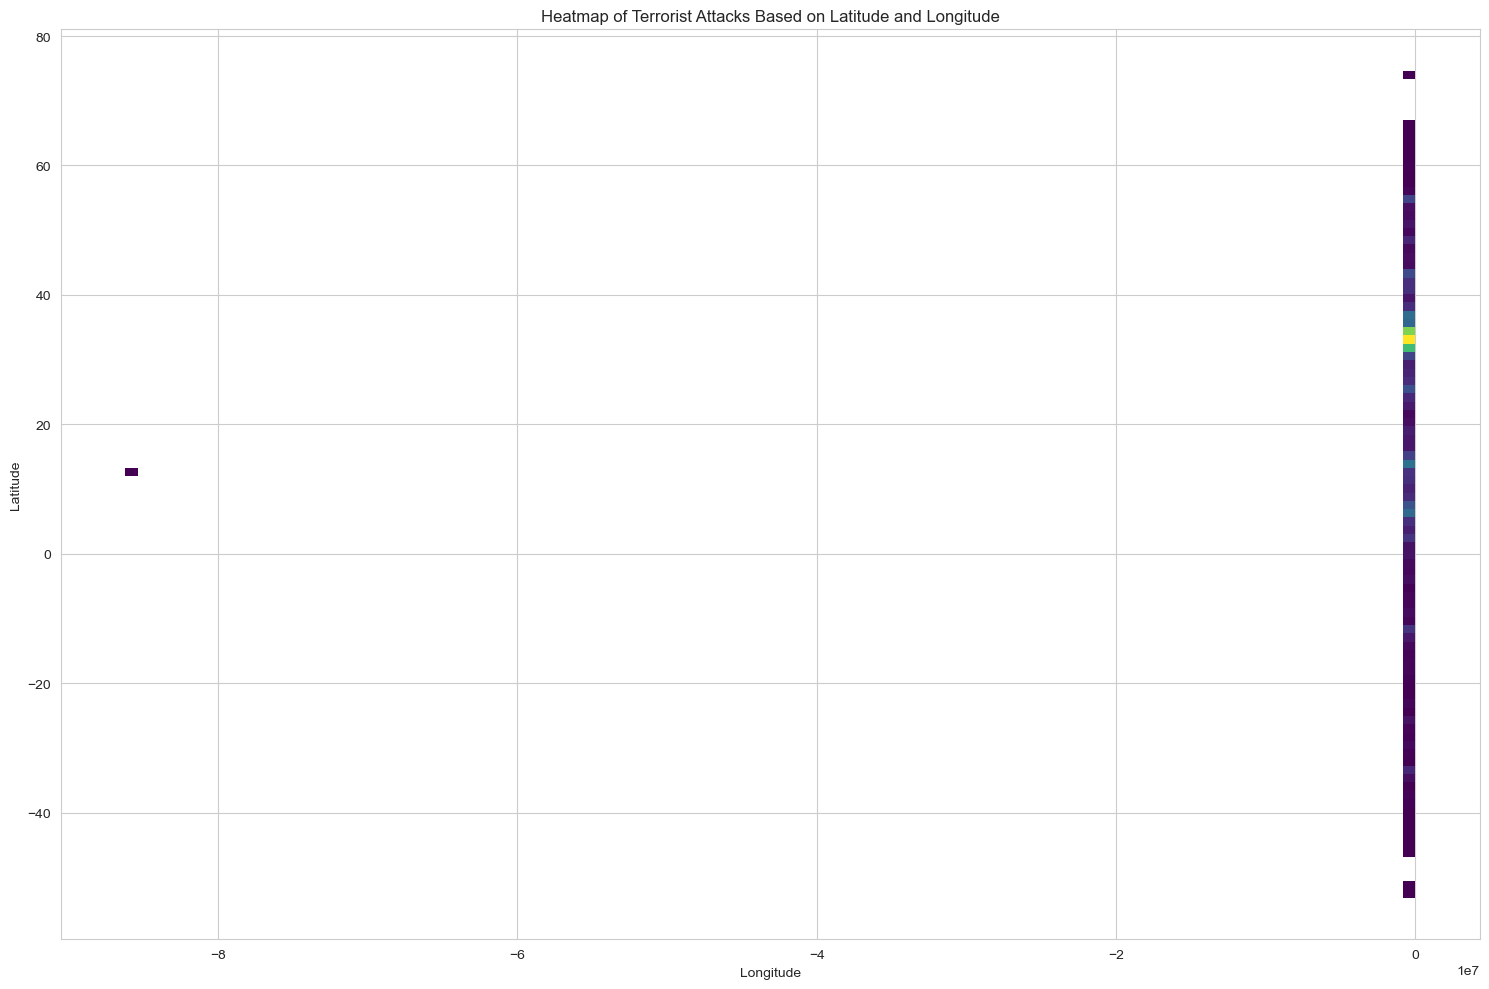

In [17]:
# Geospatial Analysis: Heatmap
plt.figure(figsize=(15, 10))
sns.histplot(data=gt_dataset, x='longitude', y='latitude', bins=100, cmap='viridis')
plt.title('Heatmap of Terrorist Attacks Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

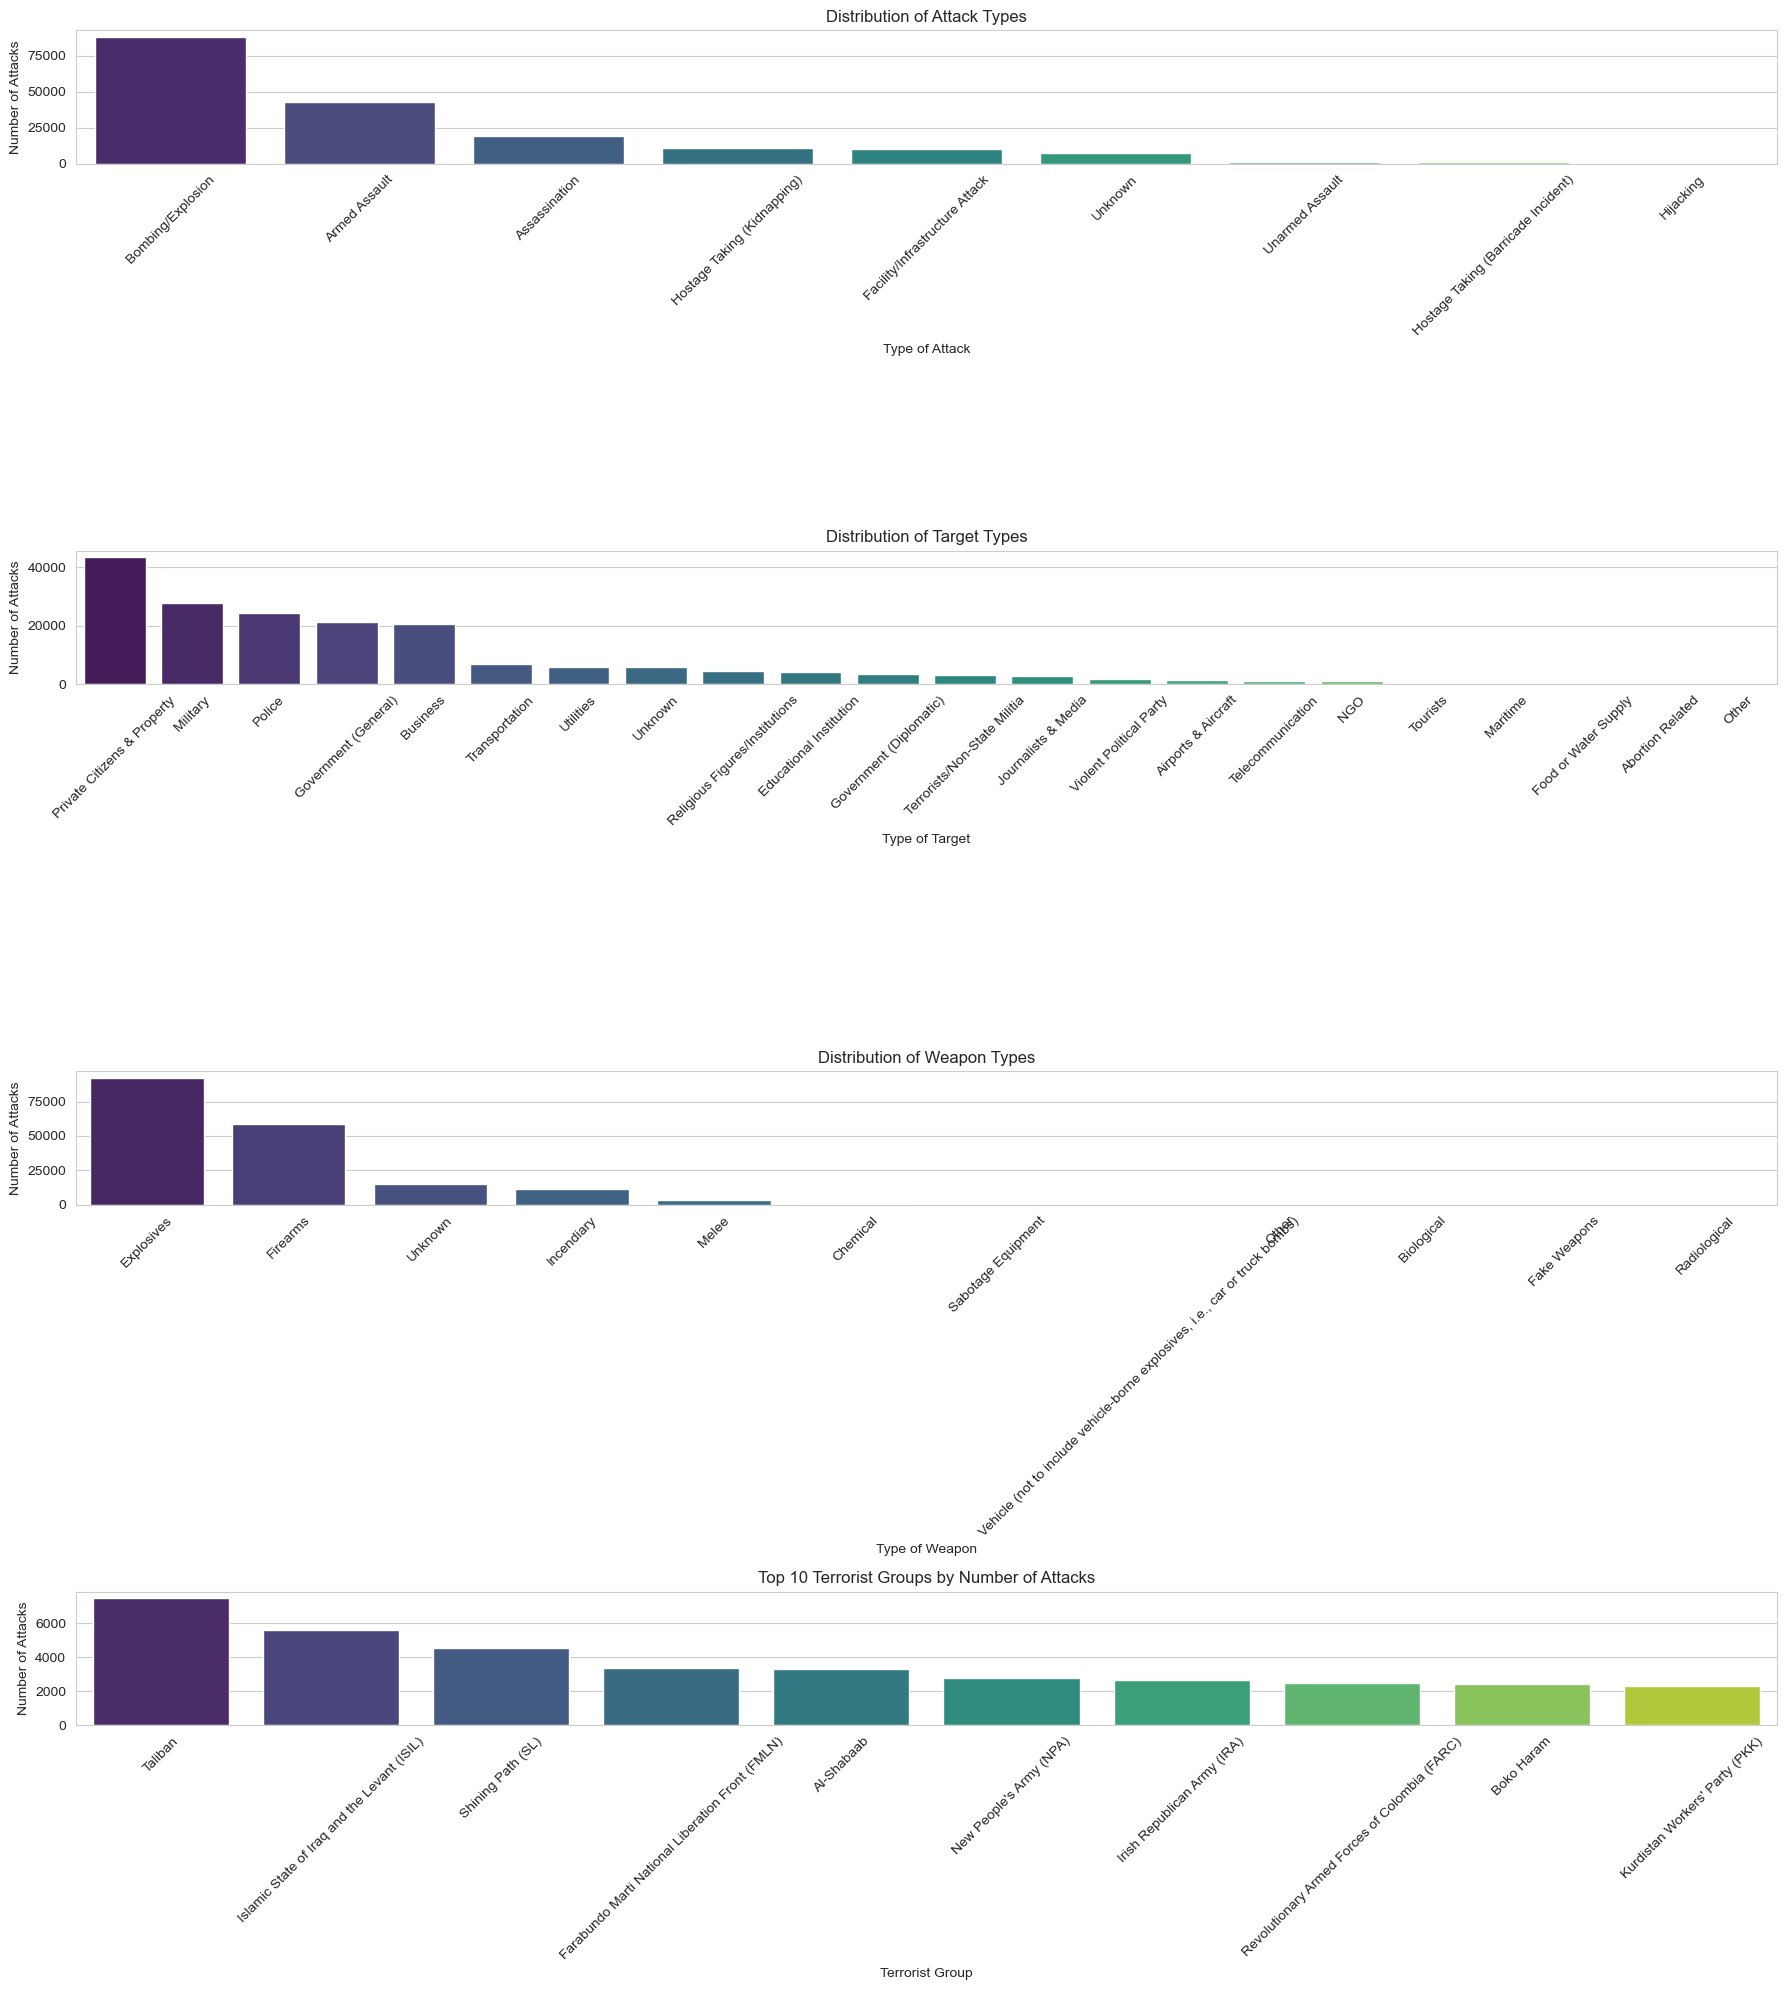

In [20]:
# Categorical Analysis
# 1. Attack Types
attack_types = gt_dataset['attacktype1_txt'].value_counts()
# 2. Target Types
target_types = gt_dataset['targtype1_txt'].value_counts()
# 3. Weapon Types
weapon_types = gt_dataset['weaptype1_txt'].value_counts()
# 4. Terrorist Groups (excluding 'Unknown')
terrorist_groups = gt_dataset[gt_dataset['gname'] != 'Unknown']['gname'].value_counts()
attack_types, target_types, weapon_types, terrorist_groups.head(10)  # Displaying top 10 terrorist groups for brevity

fig, axes = plt.subplots(4, 1, figsize=(18, 20))

# Plot for Attack Types
sns.barplot(x=attack_types.index, y=attack_types.values, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Attack Types')
axes[0].set_xlabel('Type of Attack')
axes[0].set_ylabel('Number of Attacks')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Target Types
sns.barplot(x=target_types.index, y=target_types.values, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Target Types')
axes[1].set_xlabel('Type of Target')
axes[1].set_ylabel('Number of Attacks')
axes[1].tick_params(axis='x', rotation=45)

# Plot for Weapon Types
sns.barplot(x=weapon_types.index, y=weapon_types.values, ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of Weapon Types')
axes[2].set_xlabel('Type of Weapon')
axes[2].set_ylabel('Number of Attacks')
axes[2].tick_params(axis='x', rotation=45)

# Plot for Top 10 Terrorist Groups
sns.barplot(x=terrorist_groups.head(10).index, y=terrorist_groups.head(10).values, ax=axes[3], palette='viridis')
axes[3].set_title('Top 10 Terrorist Groups by Number of Attacks')
axes[3].set_xlabel('Terrorist Group')
axes[3].set_ylabel('Number of Attacks')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



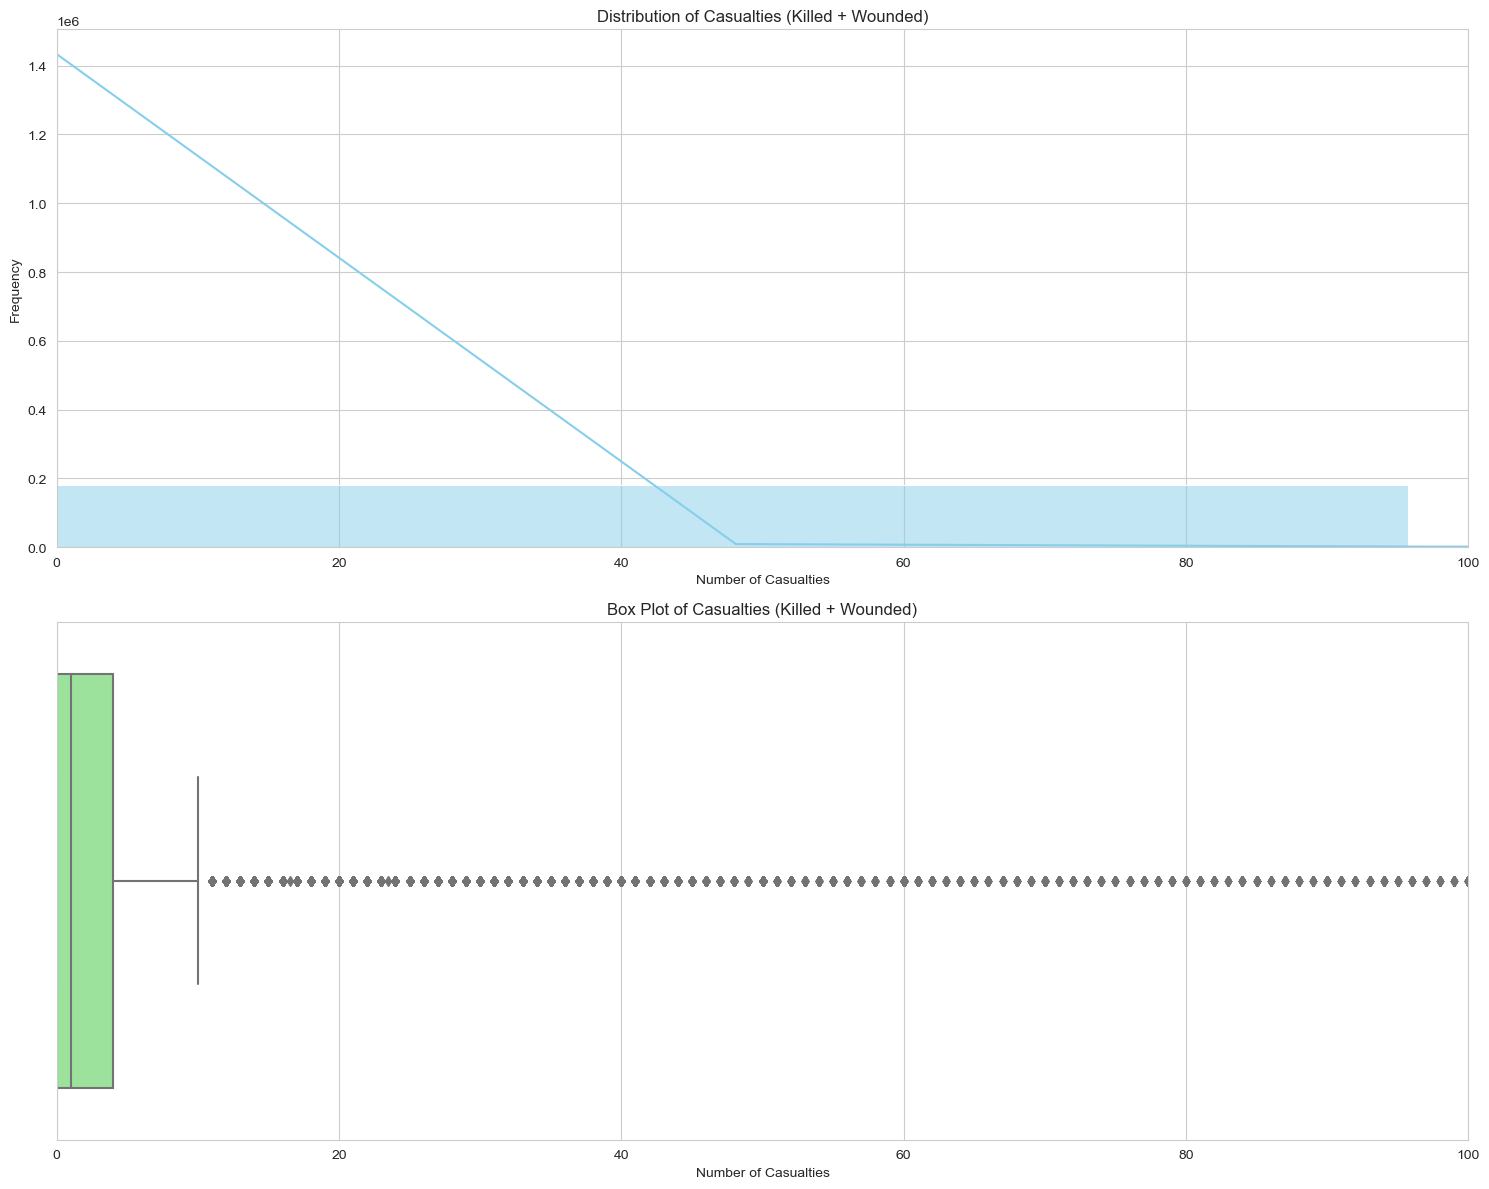

In [22]:
# Quantitative Analysis: Casualties

# Calculate total casualties (killed + wounded)
gt_dataset['casualties'] = gt_dataset['nkill'] + gt_dataset['nwound']

# Visualize the distribution of casualties
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Histogram for casualties
sns.histplot(gt_dataset['casualties'], bins=100, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Casualties (Killed + Wounded)')
axes[0].set_xlabel('Number of Casualties')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 100])  # limiting x-axis to 100 for better visualization, as there are some extreme outliers

# Box plot for casualties
sns.boxplot(x=gt_dataset['casualties'], ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot of Casualties (Killed + Wounded)')
axes[1].set_xlabel('Number of Casualties')
axes[1].set_xlim([0, 100])  # limiting x-axis to 100 for better visualization

plt.tight_layout()
plt.show()


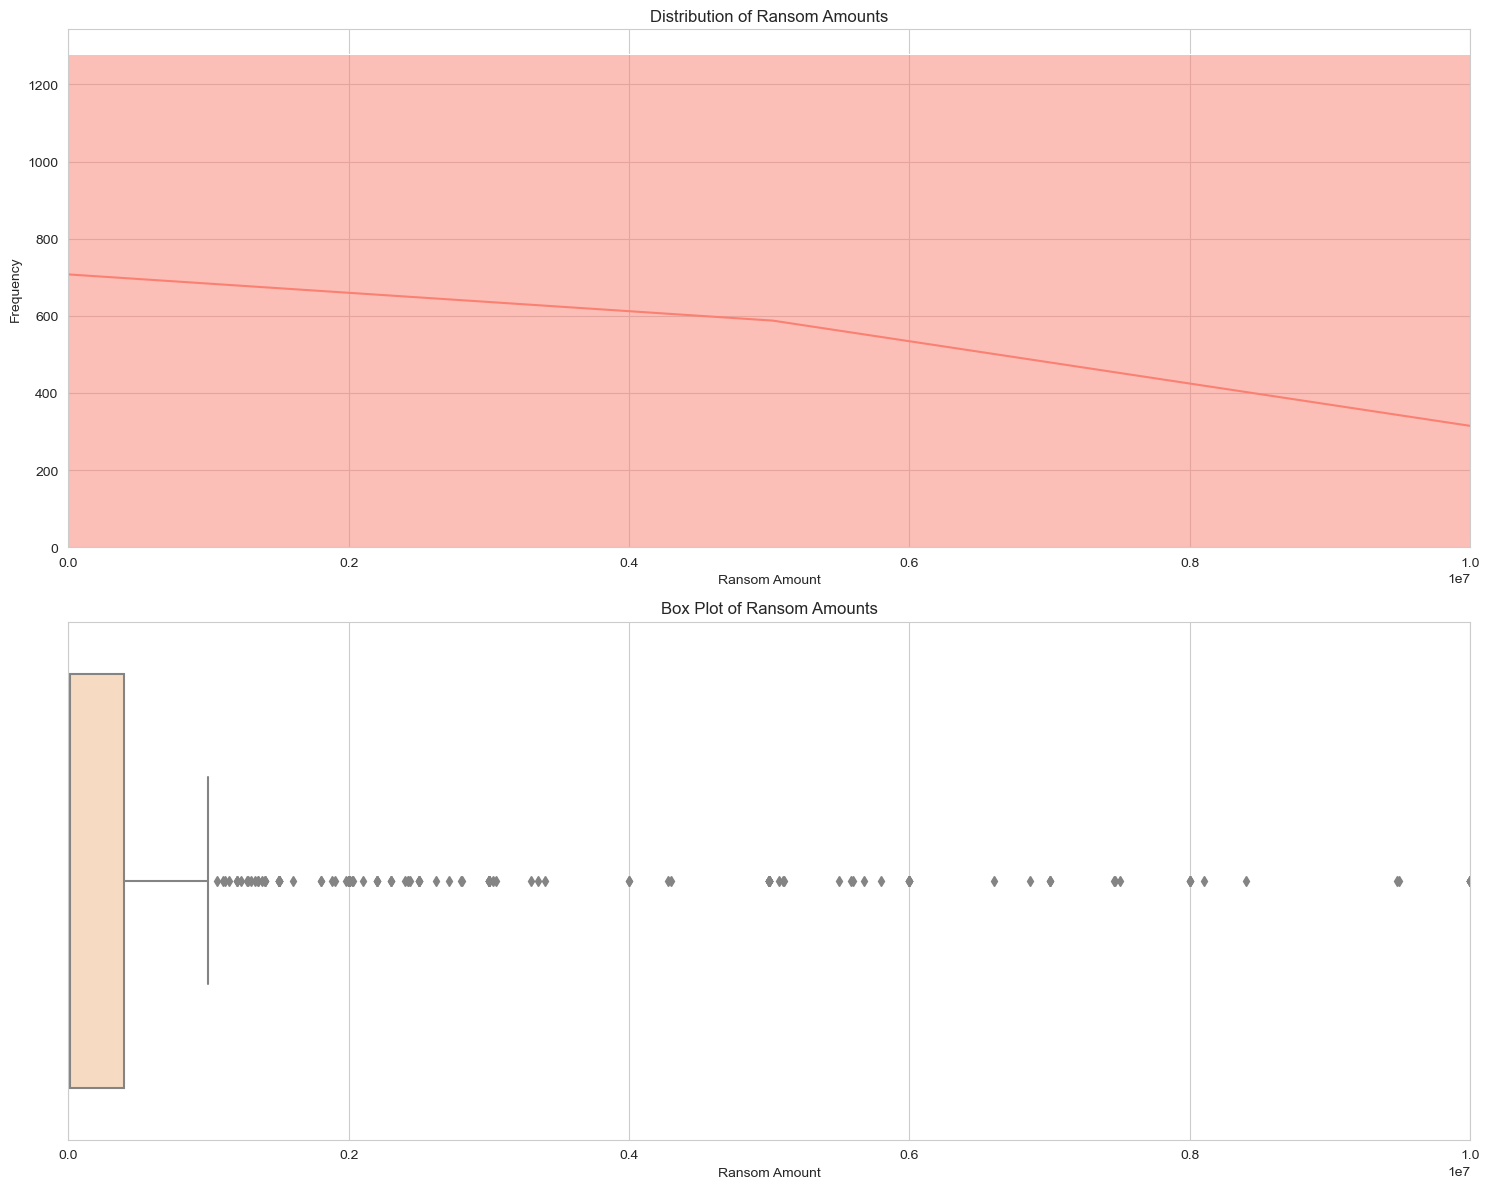

In [24]:
# Checking the number of non-missing values and reliability in the ransom columns to visualise ransom amounts over the years
# Number of non-missing values in 'ransomamt' column
ransom_data_available = df['ransomamt'].notnull().sum()
# Checking the reliability of ransom data using 'ransomamtus' (Ransom amount paid in USD)
ransom_data_reliable = df['ransomamtus'].notnull().sum()
ransom_data_available, ransom_data_reliable
# Visualizing the distribution of ransom amounts

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Histogram for ransom amounts
sns.histplot(df['ransomamt'].dropna(), bins=100, ax=axes[0], kde=True, color='salmon')
axes[0].set_title('Distribution of Ransom Amounts')
axes[0].set_xlabel('Ransom Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 10e6])  # limiting x-axis for better visualization, as there are some extreme outliers

# Box plot for ransom amounts
sns.boxplot(x=df['ransomamt'].dropna(), ax=axes[1], color='peachpuff')
axes[1].set_title('Box Plot of Ransom Amounts')
axes[1].set_xlabel('Ransom Amount')
axes[1].set_xlim([0, 10e6])  # limiting x-axis for better visualization

plt.tight_layout()
plt.show()


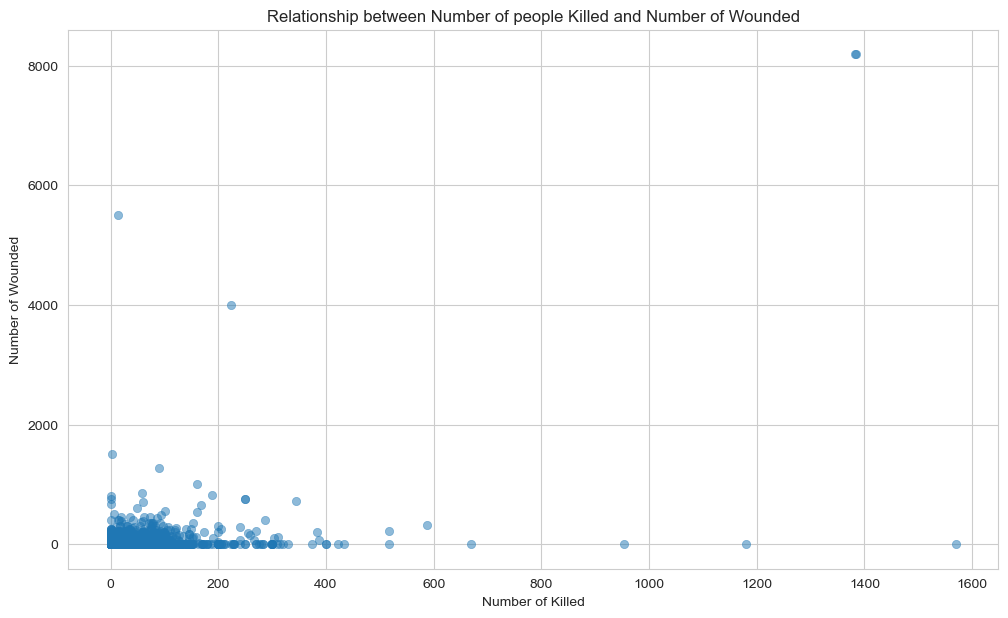

In [25]:
# Scatter Plot for relationship between 'nkill' (Number of Killed) and 'nwound' (Number of Wounded)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=gt_dataset['nkill'], y=gt_dataset['nwound'], alpha=0.5, edgecolor=None)
plt.title('Relationship between Number of people Killed and Number of Wounded')
plt.xlabel('Number of Killed')
plt.ylabel('Number of Wounded')
plt.show()

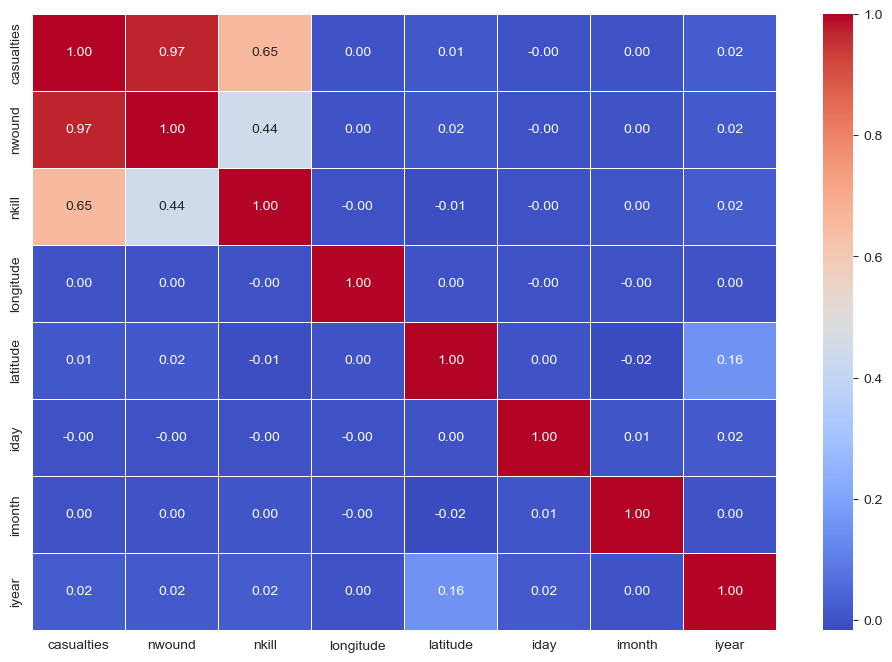

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Define the columns for subsetting
subset_columns_final = ["casualties", "nwound", "nkill", "longitude", "latitude", "iday", "imonth", "iyear"]
# Extract the specified columns from gt_dataset dataframe
subset_data_from_gt = gt_dataset[subset_columns_final]
# Compute the correlation matrix for the selected subset
correlation_from_gt = subset_data_from_gt.corr()
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_from_gt, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

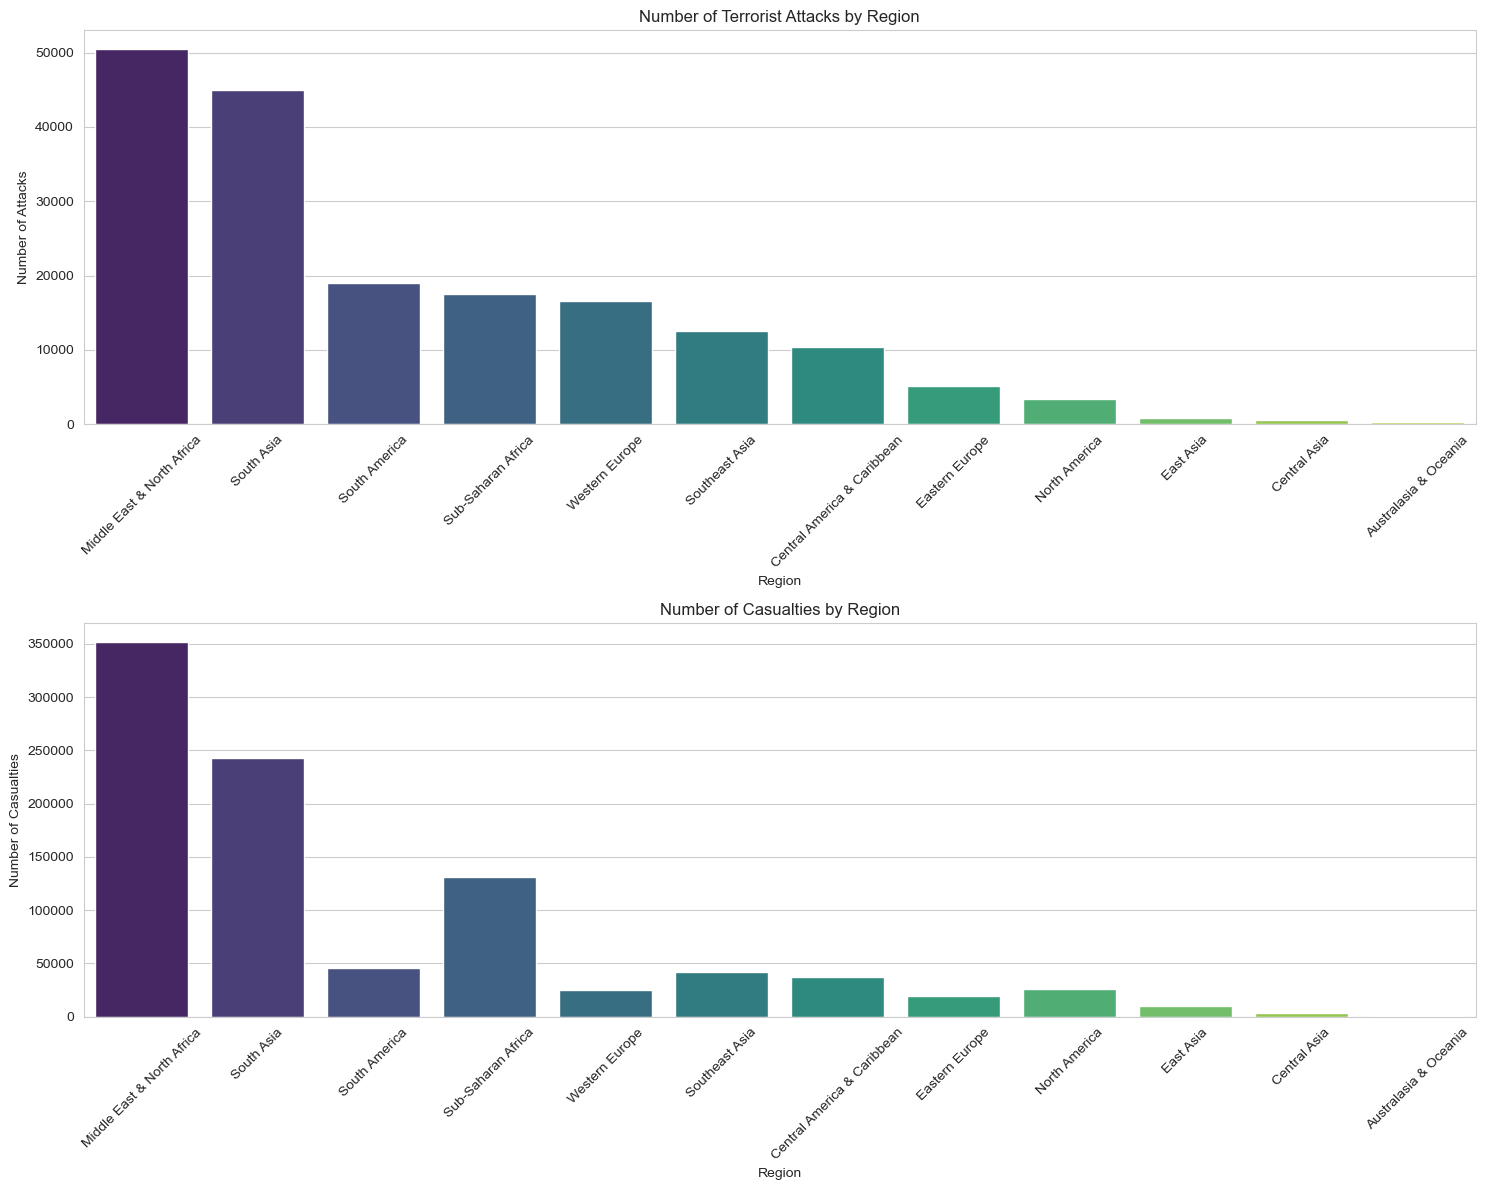

In [31]:
# Comparative Analysis: Comparing Regions
# Grouping data by region to get counts of attacks and casualties
region_comparison = gt_dataset.groupby('region_txt').agg({'eventid':'count', 'casualties':'sum'}).reset_index()
region_comparison.rename(columns={'eventid': 'number_of_attacks', 'region_txt': 'region'}, inplace=True)
region_comparison.sort_values(by='number_of_attacks', ascending=False, inplace=True)
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
# Number of Attacks by Region
sns.barplot(x='region', y='number_of_attacks', data=region_comparison, ax=axes[0], palette='viridis')
axes[0].set_title('Number of Terrorist Attacks by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Number of Attacks')
axes[0].tick_params(axis='x', rotation=45)
# Casualties by Region
sns.barplot(x='region', y='casualties', data=region_comparison, ax=axes[1], palette='viridis')
axes[1].set_title('Number of Casualties by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Number of Casualties')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

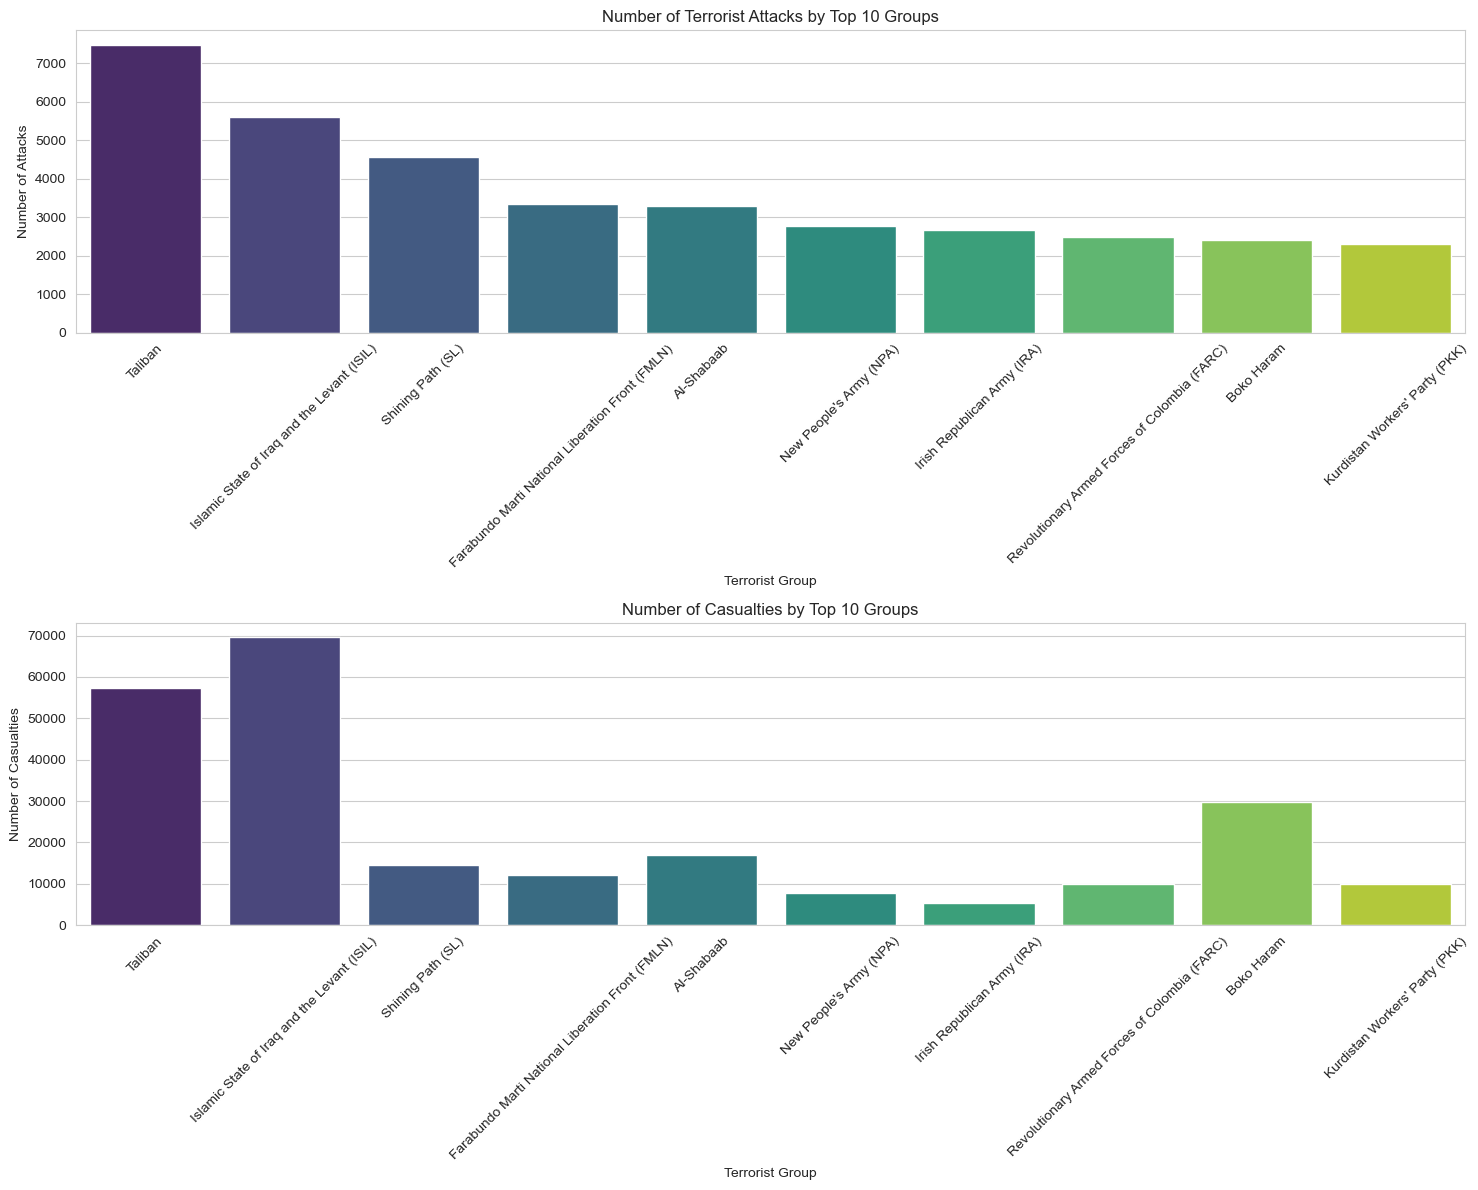

In [32]:
# Comparative Analysis: Comparing Groups
# Filtering out 'Unknown' groups
groups_data = gt_dataset[gt_dataset['gname'] != 'Unknown']
# Grouping data by terrorist groups to get counts of attacks and casualties
group_comparison = groups_data.groupby('gname').agg({'eventid':'count', 'casualties':'sum'}).reset_index()
group_comparison.rename(columns={'eventid': 'number_of_attacks', 'gname': 'group_name'}, inplace=True)
group_comparison.sort_values(by='number_of_attacks', ascending=False, inplace=True)
# Considering top 10 groups for visualization
top_10_groups = group_comparison.head(10)
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
# Number of Attacks by Group
sns.barplot(x='group_name', y='number_of_attacks', data=top_10_groups, ax=axes[0], palette='viridis')
axes[0].set_title('Number of Terrorist Attacks by Top 10 Groups')
axes[0].set_xlabel('Terrorist Group')
axes[0].set_ylabel('Number of Attacks')
axes[0].tick_params(axis='x', rotation=45)
# Casualties by Group
sns.barplot(x='group_name', y='casualties', data=top_10_groups, ax=axes[1], palette='viridis')
axes[1].set_title('Number of Casualties by Top 10 Groups')
axes[1].set_xlabel('Terrorist Group')
axes[1].set_ylabel('Number of Casualties')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()